### Из изменений в сравнении с NeuralNetwork_7 // короткое diff-содержание .ipynb
1. Начата разработка функции def groupby из модуля tools.py

In [1]:
import pandas as pd
import os
import sqlite3

In [2]:
N = 8

project_dir_path = os.environ["NIR_1_sem_magistracy"]
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)
name_db = 'Aleksashina_Керов_Андрей'
db_file = f"{name_db}.db"
db_path = os.path.join(db_dir_path, db_file)

In [4]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [5]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [6]:
df['Arousal'].apply(lambda x: float(x))

0        0.247500
1        0.247500
2        0.247500
3        0.247500
4        0.247500
           ...   
20842    0.287489
20843    0.287139
20844    0.286695
20845    0.286170
20846    0.285693
Name: Arousal, Length: 25321, dtype: float64

In [7]:
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

for field in seven_fields:
    df[field] = df[field].apply(lambda x: float(x))

In [8]:
seven_vector = df[seven_fields]

In [9]:
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
0,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141
1,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139
2,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136
3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134
4,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130
...,...,...,...,...,...,...,...
20842,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692
20843,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799
20844,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849
20845,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878


In [10]:
seven_vector.index = list(df['Index_'])
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849
00:01:52.000_Куликов Алексей_1,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878


In [11]:
seven_vector.columns

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [12]:
for field in seven_vector.columns:
    seven_vector[field] = seven_vector[field].apply(lambda x: round(x, 2))

/tmp/ipykernel_37804/1955116671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_vector[field] = seven_vector[field].apply(lambda x: round(x, 2))


In [13]:
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.030_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.060_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.090_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.121_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.93,0.0,0.02,0.07,0.03,0.0,0.0
00:01:51.800_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0
00:01:51.900_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0
00:01:52.000_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0


In [16]:
groupby_7 = list(seven_vector.groupby(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']))
groupby_7[:5]

[((0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.99),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.500_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.600_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.700_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  
                          Disgusted  
  00:00:08.500_Nasyrov_7       0.99  
  00:00:08.600_Nasyrov_7       0.99  
  00:00:08.700_Nasyrov_7       0.99  ),
 ((0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 1.0),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.800_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.900_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.000_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.100_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.200_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  
         

In [17]:
groupby_7_sorted = sorted(groupby_7, key=lambda x: -len(x[1]))
groupby_7_sorted[:5]

[((1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
                                   Neutral  Happy  Sad  Angry  Surprised  \
  00:00:01.000_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.030_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.060_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.090_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.121_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  ...                                  ...    ...  ...    ...        ...   
  00:01:51.900_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.000_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.100_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.200_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.300_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  
                                   Scared  Dis

In [18]:
df_7 = groupby_7_sorted[0][1]
df_7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:01.000_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.030_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.060_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.090_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.121_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
00:01:51.900_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.000_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.100_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.200_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for group in groupby_7_sorted[1:]:
    df_7 = pd.concat([df_7, group[1]], axis=0)

In [20]:
df_7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:01.000_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.030_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.060_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.090_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.121_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...
00:00:53.700_Турчина Екатерина_1,0.99,0.02,0.0,0.00,0.01,0.01,0.0
00:00:53.800_Турчина Екатерина_1,0.99,0.03,0.0,0.00,0.00,0.01,0.0
00:00:07.800_Provotorov_10,1.00,0.00,0.0,0.00,0.01,0.01,0.0
00:00:00.600_Боим_9,1.00,0.00,0.0,0.01,0.01,0.00,0.0


In [21]:
pa_fields =     [
    'Valence',
    'Arousal'
]

for field in pa_fields:
    df[field] = df[field].apply(lambda x: float(x))

In [22]:
pa_vector = df[pa_fields]

In [23]:
pa_vector

,Valence,Arousal
0,-0.005061,0.247500
1,-0.004977,0.247500
2,-0.004893,0.247500
3,-0.004809,0.247500
4,-0.004678,0.247500
...,...,...
20842,-0.067925,0.287489
20843,-0.062565,0.287139
20844,-0.059330,0.286695
20845,-0.056494,0.286170


In [24]:
round(3.141592, 2)

3.14

In [25]:
pa_vector['Valence'] = pa_vector['Valence'].apply(lambda x: round(x, 2))

/tmp/ipykernel_37804/218885347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_vector['Valence'] = pa_vector['Valence'].apply(lambda x: round(x, 2))


In [26]:
pa_vector['Arousal'] = pa_vector['Arousal'].apply(lambda x: round(x, 2))

/tmp/ipykernel_37804/3869498330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_vector['Arousal'] = pa_vector['Arousal'].apply(lambda x: round(x, 2))


In [27]:
pa_vector

,Valence,Arousal
0,-0.01,0.25
1,-0.00,0.25
2,-0.00,0.25
3,-0.00,0.25
4,-0.00,0.25
...,...,...
20842,-0.07,0.29
20843,-0.06,0.29
20844,-0.06,0.29
20845,-0.06,0.29


In [28]:
pa_vector.index = list(df['Index_'])

In [29]:
groupby = list(pa_vector.groupby(['Valence', 'Arousal']))
groupby[:5]

[((-1.0, 0.63),
                          Valence  Arousal
  00:00:08.800_Nasyrov_7     -1.0     0.63
  00:00:08.900_Nasyrov_7     -1.0     0.63
  00:00:09.000_Nasyrov_7     -1.0     0.63
  00:00:09.100_Nasyrov_7     -1.0     0.63
  00:00:09.200_Nasyrov_7     -1.0     0.63),
 ((-0.99, 0.62),
                          Valence  Arousal
  00:00:07.300_Nasyrov_7    -0.99     0.62
  00:00:07.400_Nasyrov_7    -0.99     0.62),
 ((-0.99, 0.63),
                          Valence  Arousal
  00:00:07.500_Nasyrov_7    -0.99     0.63
  00:00:07.600_Nasyrov_7    -0.99     0.63
  00:00:07.700_Nasyrov_7    -0.99     0.63
  00:00:07.800_Nasyrov_7    -0.99     0.63
  00:00:07.900_Nasyrov_7    -0.99     0.63
  00:00:08.000_Nasyrov_7    -0.99     0.63
  00:00:08.100_Nasyrov_7    -0.99     0.63
  00:00:08.200_Nasyrov_7    -0.99     0.63
  00:00:08.300_Nasyrov_7    -0.99     0.63
  00:00:08.400_Nasyrov_7    -0.99     0.63
  00:00:08.500_Nasyrov_7    -0.99     0.63
  00:00:08.600_Nasyrov_7    -0.99     0.63


In [30]:
len(groupby[0][1])

5

In [31]:
groupby_va = sorted(groupby, key=lambda x: -len(x[1]))
groupby_va[:5]

[((-0.0, 0.25),
                                   Valence  Arousal
  00:00:00.030_Керов Андрей_3         -0.0     0.25
  00:00:00.060_Керов Андрей_3         -0.0     0.25
  00:00:00.090_Керов Андрей_3         -0.0     0.25
  00:00:00.121_Керов Андрей_3         -0.0     0.25
  00:00:00.151_Керов Андрей_3         -0.0     0.25
  ...                                  ...      ...
  00:01:51.900_Смолин Александр_1     -0.0     0.25
  00:01:52.000_Смолин Александр_1     -0.0     0.25
  00:01:52.100_Смолин Александр_1     -0.0     0.25
  00:01:52.200_Смолин Александр_1     -0.0     0.25
  00:01:52.300_Смолин Александр_1     -0.0     0.25
  
  [1072 rows x 2 columns]),
 ((-0.01, 0.25),
                                 Valence  Arousal
  00:00:00.000_Керов Андрей_3      -0.01     0.25
  00:00:01.030_Керов Андрей_3      -0.01     0.25
  00:00:01.060_Керов Андрей_3      -0.01     0.25
  00:00:01.090_Керов Андрей_3      -0.01     0.25
  00:00:01.121_Керов Андрей_3      -0.01     0.25
  ...       

In [32]:
df.index = df['Index_']

In [33]:
fields = seven_fields + pa_fields

In [34]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [35]:
df_fields = df[fields]
df_fields

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [36]:
for field in fields:
    df_fields[field] = df_fields[field].apply(lambda x: round(x, 2))

/tmp/ipykernel_37804/1634952075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fields[field] = df_fields[field].apply(lambda x: round(x, 2))


In [37]:
df_fields

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.01,0.25
00:00:00.030_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.93,0.0,0.02,0.07,0.03,0.0,0.0,-0.07,0.29
00:01:51.800_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0,-0.06,0.29
00:01:51.900_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0,-0.06,0.29


In [39]:
groupby_fields_sorted = list(sorted(df_fields.groupby(['Valence', 'Arousal'])
                                    , key=lambda x: -len(x[1])))
groupby_fields_sorted[:5]

[((-0.0, 0.25),
                                   Neutral  Happy   Sad  Angry  Surprised  \
  Index_                                                                    
  00:00:00.030_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.060_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.090_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.121_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.151_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  ...                                  ...    ...   ...    ...        ...   
  00:01:51.900_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.000_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.100_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.200_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.300_Смолин Александр_1     1.00    0.0  0.00    0

In [40]:
df_train = groupby_fields_sorted[0][1].iloc[0:1]
for group in groupby_fields_sorted:
    df_train = pd.concat([df_train, group[1].iloc[0:1]], axis=0)

In [41]:
df_train = df_train.drop_duplicates(fields)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.000_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0,-0.01,0.25
00:00:07.212_Керов Андрей_6,0.96,0.00,0.02,0.01,0.03,0.0,0.0,-0.02,0.25
00:00:01.212_Керов Андрей_3,0.96,0.00,0.01,0.00,0.01,0.0,0.0,-0.01,0.26
00:00:07.363_Керов Андрей_6,0.95,0.00,0.02,0.03,0.03,0.0,0.0,-0.03,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [42]:
pa_vector = df_train[pa_fields]
pa_vector

,Valence,Arousal
Index_,,
00:00:00.030_Керов Андрей_3,-0.00,0.25
00:00:00.000_Керов Андрей_3,-0.01,0.25
00:00:07.212_Керов Андрей_6,-0.02,0.25
00:00:01.212_Керов Андрей_3,-0.01,0.26
00:00:07.363_Керов Андрей_6,-0.03,0.25
...,...,...
00:00:17.500_Смолин Александр_1,0.96,0.90
00:00:20.900_Aleksashina_1,0.97,0.67
00:00:16.900_Смолин Александр_1,0.97,0.87


In [43]:
seven_vector = df_train[seven_fields]
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0
00:00:00.000_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0
00:00:07.212_Керов Андрей_6,0.96,0.00,0.02,0.01,0.03,0.0,0.0
00:00:01.212_Керов Андрей_3,0.96,0.00,0.01,0.00,0.01,0.0,0.0
00:00:07.363_Керов Андрей_6,0.95,0.00,0.02,0.03,0.03,0.0,0.0
...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0


In [44]:
import numpy as np

In [45]:
x = []
for i in range(len(pa_vector)):
    x.append((pa_vector['Valence'][i], pa_vector['Arousal'][i])) 
    
x = np.array(x)

In [46]:
x.shape

(5066, 2)

In [47]:
y = []
for i in range(len(pa_vector)):
    y.append(tuple(seven_vector[col][i] for col in seven_vector.columns)) 
y = np.array(y)

In [48]:
y.shape

(5066, 7)

In [49]:
from keras.models import Model
from keras.layers import Input, Dense

2024-03-13 00:06:14.071012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-13 00:06:14.071404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [50]:
a = Input(shape=(2,))
first = Dense(5, activation='relu')(a)
second = Dense(6, activation='relu')(first)
third = Dense(7, activation='relu')(second)
b = Dense(7, activation='sigmoid')(third)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

2024-03-13 00:06:17.926613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-13 00:06:17.926657: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 00:06:17.926682: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ivan-PC): /proc/driver/nvidia/version does not exist
2024-03-13 00:06:17.930257: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
model.fit(x=x, y=y, epochs=20, batch_size=30)

Epoch 1/20
169/169 [==============================] - 1s 2ms/step - loss: 0.1605
Epoch 2/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 3/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 4/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 5/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 6/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 7/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 8/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 9/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 10/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 11/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 12/20
169/169 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 13/20
169/169 [====

In [53]:
from tensorflow.keras.utils import plot_model

In [54]:
architecture_models_dir = 'architecture_models'
architecture_models_dir_path = os.path.join(project_dir_path, architecture_models_dir)
architecture_models = list(os.walk(architecture_models_dir_path))
architecture_models

[('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/architecture_models',
  [],
  ['4 (activation).png',
   '7.png',
   '6.9.png',
   '6.png',
   '1.png',
   '8.png',
   '3.png',
   '2.png',
   '5.png'])]

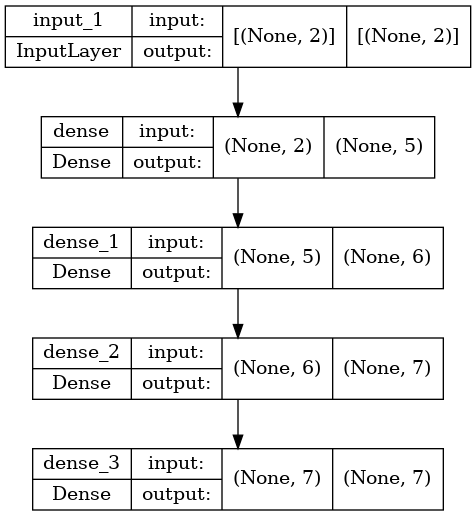

In [55]:
architecture_models = architecture_models[0]
architecture_models_dir_path = architecture_models[0]
path = os.path.join(project_dir_path, architecture_models_dir, f'{N}.png')
plot_model(model, to_file=path, show_shapes=True, show_layer_names=True)

In [56]:
class NeuralNetwork:
    def __init__(self, x, y, model):
        self.df_x = x
        self.df_y = y
        self.model = model
        self.from_ = 0
        self.to = 1
    
    def get_df_xy(self, from_ = None, to = None, xy = None):
        if xy is None:
            xy = 'x'
        
        if from_ is None:
            from_ = self.from_
        else:
            self.from_ = from_
            
        if to is None:
            to = self.to
        else:
            self.to = to
        
        if xy.lower() == 'x':   
            return self.df_x[from_:to]
        elif xy.lower() == 'y':   
            return self.df_y[from_:to]
    
    def predict(self):
        df_x = self.get_df_xy(self.from_, self.to)
        df_res = pd.DataFrame(self.model.predict(df_x.values))
        df_res.columns = self.df_y.columns
        df_res.index = df_x.index
        return df_res

In [57]:
model

In [58]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [59]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

In [60]:
def create_add_to_index(csv_file):
    import re
    res = []
    without_participant = re.split('Participant \d*', csv_file)[1]
    fragments = re.split('Analysis ', without_participant)
    res.append(fragments[0])
    res.append(re.split('_video_', fragments[1])[0])
    return ''.join(res)

In [61]:
add_to_index = create_add_to_index('Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv')
add_to_index

'_Aleksashina_1'

In [62]:
df_x = nn.get_df_xy('00:00:00.000' + add_to_index, '00:00:00.100' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:00:00.000_Aleksashina_1,-0.024352,0.255187
00:00:00.100_Aleksashina_1,-0.022284,0.260074


In [63]:
df_y = nn.get_df_xy(xy = 'y') #Neutral - 97%, Happy - 1-2%, Angry - 4%
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.000_Aleksashina_1,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946
00:00:00.100_Aleksashina_1,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820


In [64]:
nn.predict() # Понимает, что NEUTRAL. Neutral - err 16%, Happy - err 8-9%, Angry - err 3-4%

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.000_Aleksashina_1,0.531884,0.067218,0.000113,0.142932,0.000042,0.000312,0.000018
00:00:00.100_Aleksashina_1,0.531978,0.067718,0.000115,0.142755,0.000042,0.000315,0.000018


In [65]:
df_x = nn.get_df_xy('00:00:16.000' + add_to_index, '00:00:17.000' + add_to_index) # Happy
df_x

,Valence,Arousal
Index_,,
00:00:16.000_Aleksashina_1,0.982274,0.763761
00:00:16.100_Aleksashina_1,0.982497,0.761543
00:00:16.200_Aleksashina_1,0.982457,0.759395
00:00:16.300_Aleksashina_1,0.982780,0.757186
00:00:16.400_Aleksashina_1,0.983181,0.754926
00:00:16.500_Aleksashina_1,0.983513,0.752694
00:00:16.600_Aleksashina_1,0.983897,0.750396
00:00:16.700_Aleksashina_1,0.983741,0.748033
00:00:16.800_Aleksashina_1,0.982967,0.745634


In [66]:
nn.from_

'00:00:16.000_Aleksashina_1'

In [67]:
nn.to

'00:00:17.000_Aleksashina_1'

In [68]:
df_y = nn.get_df_xy(xy = 'y') # Happy
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:16.000_Aleksashina_1,0.007980,0.984054,0.000013,0.001780,0.002200,0.001339,0.000060
00:00:16.100_Aleksashina_1,0.007884,0.984246,0.000013,0.001749,0.002323,0.001302,0.000059
00:00:16.200_Aleksashina_1,0.007840,0.984331,0.000013,0.001875,0.002367,0.001226,0.000057
00:00:16.300_Aleksashina_1,0.007679,0.984653,0.000014,0.001873,0.002433,0.001246,0.000056
00:00:16.400_Aleksashina_1,0.007520,0.984970,0.000014,0.001789,0.002598,0.001347,0.000054
00:00:16.500_Aleksashina_1,0.007385,0.985240,0.000014,0.001727,0.002701,0.001379,0.000054
00:00:16.600_Aleksashina_1,0.007240,0.985530,0.000014,0.001633,0.002647,0.001379,0.000053
00:00:16.700_Aleksashina_1,0.007345,0.985320,0.000014,0.001580,0.002596,0.001452,0.000057
00:00:16.800_Aleksashina_1,0.007730,0.984552,0.000013,0.001585,0.002543,0.001457,0.000060


In [69]:
nn.predict() # Nice Happy, but Neutral...

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:16.000_Aleksashina_1,0.581090,0.805129,0.071027,0.076134,0.075636,0.068076,0.076975
00:00:16.100_Aleksashina_1,0.581079,0.805117,0.070986,0.076120,0.075581,0.068031,0.076920
00:00:16.200_Aleksashina_1,0.581060,0.805096,0.070913,0.076095,0.075487,0.067954,0.076825
00:00:16.300_Aleksashina_1,0.581052,0.805087,0.070884,0.076085,0.075450,0.067923,0.076787
00:00:16.400_Aleksashina_1,0.581047,0.805081,0.070864,0.076078,0.075423,0.067901,0.076760
00:00:16.500_Aleksashina_1,0.581039,0.805073,0.070836,0.076068,0.075386,0.067871,0.076723
00:00:16.600_Aleksashina_1,0.581033,0.805066,0.070812,0.076060,0.075355,0.067846,0.076692
00:00:16.700_Aleksashina_1,0.581008,0.805038,0.070718,0.076027,0.075234,0.067746,0.076569
00:00:16.800_Aleksashina_1,0.580962,0.804987,0.070546,0.075968,0.075010,0.067563,0.076343


In [70]:
df_x = nn.get_df_xy('00:00:21.000' + add_to_index, '00:00:23.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:00:21.000_Aleksashina_1,0.964579,0.663201
00:00:21.100_Aleksashina_1,0.943782,0.659207
00:00:21.200_Aleksashina_1,0.871111,0.652940
00:00:21.300_Aleksashina_1,0.762326,0.644623
00:00:21.400_Aleksashina_1,0.640243,0.633058
00:00:21.500_Aleksashina_1,0.520727,0.618742
00:00:21.600_Aleksashina_1,0.413288,0.603645
00:00:21.700_Aleksashina_1,0.323662,0.588063
00:00:21.800_Aleksashina_1,0.251679,0.572172


In [71]:
df_y = nn.get_df_xy(xy = 'y') # Serious
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:21.000_Aleksashina_1,0.019636,0.966993,0.000121,0.002414,0.002644,0.002096,0.000165
00:00:21.100_Aleksashina_1,0.051523,0.946047,0.000221,0.002265,0.002547,0.002061,0.000355
00:00:21.200_Aleksashina_1,0.135548,0.875374,0.000303,0.004263,0.002576,0.001903,0.000715
00:00:21.300_Aleksashina_1,0.247636,0.770754,0.000351,0.008427,0.002592,0.001688,0.000968
00:00:21.400_Aleksashina_1,0.365667,0.655739,0.000364,0.015496,0.002655,0.001459,0.001092
00:00:21.500_Aleksashina_1,0.477339,0.544180,0.000356,0.023453,0.002761,0.001233,0.001120
00:00:21.600_Aleksashina_1,0.576351,0.443905,0.000341,0.030617,0.002846,0.001026,0.001090
00:00:21.700_Aleksashina_1,0.660592,0.357482,0.000767,0.033820,0.002812,0.000842,0.001407
00:00:21.800_Aleksashina_1,0.730230,0.284993,0.004092,0.033314,0.002743,0.000681,0.002124


In [72]:
nn.predict() # Angry? Neutral and Happy - about 10%

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:21.000_Aleksashina_1,0.579662,0.803532,0.065818,0.074296,0.068916,0.062546,0.070185
00:00:21.100_Aleksashina_1,0.579142,0.797623,0.062031,0.074628,0.064318,0.059437,0.065024
00:00:21.200_Aleksashina_1,0.577478,0.773640,0.050073,0.076435,0.050154,0.049704,0.049223
00:00:21.300_Aleksashina_1,0.574991,0.734220,0.036207,0.079208,0.034387,0.037939,0.032244
00:00:21.400_Aleksashina_1,0.570455,0.652242,0.019882,0.084489,0.017095,0.023046,0.014723
00:00:21.500_Aleksashina_1,0.565468,0.550893,0.010215,0.090647,0.007864,0.013250,0.006164
00:00:21.600_Aleksashina_1,0.560600,0.447927,0.005317,0.097025,0.003675,0.007700,0.002628
00:00:21.700_Aleksashina_1,0.554992,0.335353,0.002504,0.104848,0.001529,0.004114,0.000984
00:00:21.800_Aleksashina_1,0.550516,0.256869,0.001373,0.111470,0.000760,0.002495,0.000450


In [73]:
df_x = nn.get_df_xy('00:00:36.000' + add_to_index, '00:00:37.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:00:36.000_Aleksashina_1,-0.214707,0.260461
00:00:36.100_Aleksashina_1,-0.215263,0.259816
00:00:36.200_Aleksashina_1,-0.183632,0.259228
00:00:36.300_Aleksashina_1,-0.147168,0.258936
00:00:36.400_Aleksashina_1,-0.117836,0.258876
00:00:36.500_Aleksashina_1,-0.091053,0.258876
00:00:36.600_Aleksashina_1,-0.067193,0.262077
00:00:36.700_Aleksashina_1,-0.040169,0.265263
00:00:36.800_Aleksashina_1,-0.026193,0.267305


In [74]:
df_y = nn.get_df_xy(xy = 'y') # Angry
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:36.000_Aleksashina_1,0.189787,0.446914,0.000195,0.661620,0.000168,0.000154,0.000912
00:00:36.100_Aleksashina_1,0.184945,0.455178,0.000176,0.670441,0.000158,0.000153,0.000907
00:00:36.200_Aleksashina_1,0.189195,0.478034,0.000159,0.661666,0.000151,0.000145,0.000883
00:00:36.300_Aleksashina_1,0.196710,0.498410,0.000149,0.645577,0.000148,0.000137,0.000835
00:00:36.400_Aleksashina_1,0.201433,0.516213,0.000143,0.634049,0.000147,0.000128,0.000784
00:00:36.500_Aleksashina_1,0.206537,0.530494,0.000139,0.621547,0.000150,0.000119,0.000746
00:00:36.600_Aleksashina_1,0.213259,0.539001,0.000133,0.606194,0.000154,0.000111,0.000718
00:00:36.700_Aleksashina_1,0.216637,0.549414,0.000127,0.589583,0.000160,0.000107,0.000705
00:00:36.800_Aleksashina_1,0.218805,0.557725,0.000121,0.583918,0.000159,0.000102,0.000706


In [75]:
nn.predict() # ПЛОХО

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:36.000_Aleksashina_1,0.514991,0.017206,0.000012,0.177370,0.000003,0.000048,9.352589e-07
00:00:36.100_Aleksashina_1,0.514960,0.017161,0.000012,0.177440,0.000003,0.000048,9.301745e-07
00:00:36.200_Aleksashina_1,0.517720,0.021524,0.000017,0.171403,0.000005,0.000065,1.500592e-06
00:00:36.300_Aleksashina_1,0.520891,0.027884,0.000026,0.164667,0.000008,0.000092,2.599830e-06
00:00:36.400_Aleksashina_1,0.523437,0.034280,0.000037,0.159414,0.000011,0.000122,4.042001e-06
00:00:36.500_Aleksashina_1,0.525758,0.041334,0.000050,0.154740,0.000016,0.000158,6.046204e-06
00:00:36.600_Aleksashina_1,0.527745,0.048463,0.000065,0.150825,0.000022,0.000197,8.536669e-06
00:00:36.700_Aleksashina_1,0.530205,0.058907,0.000091,0.146093,0.000032,0.000259,1.308365e-05
00:00:36.800_Aleksashina_1,0.531468,0.065064,0.000107,0.143709,0.000039,0.000298,1.629441e-05


In [76]:
df_x = nn.get_df_xy('00:00:47.000' + add_to_index, '00:00:48.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:00:47.000_Aleksashina_1,0.402050,0.299550
00:00:47.100_Aleksashina_1,0.402333,0.299550
00:00:47.200_Aleksashina_1,0.403500,0.299481
00:00:47.300_Aleksashina_1,0.406274,0.299384
00:00:47.400_Aleksashina_1,0.406193,0.299230
00:00:47.500_Aleksashina_1,0.415290,0.299125
00:00:47.600_Aleksashina_1,0.418139,0.298942
00:00:47.700_Aleksashina_1,0.423579,0.298760
00:00:47.800_Aleksashina_1,0.431206,0.298555


In [77]:
df_y = nn.get_df_xy(xy = 'y') # Удивление (Neutral + Happy)
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:47.000_Aleksashina_1,0.710237,0.407821,0.000096,0.005771,0.004438,0.000165,0.000185
00:00:47.100_Aleksashina_1,0.711148,0.408063,0.000100,0.005730,0.004281,0.000168,0.000181
00:00:47.200_Aleksashina_1,0.713677,0.409234,0.000102,0.005734,0.004085,0.000167,0.000180
00:00:47.300_Aleksashina_1,0.714254,0.412195,0.000105,0.005921,0.003882,0.000161,0.000175
00:00:47.400_Aleksashina_1,0.716460,0.412444,0.000108,0.006251,0.003699,0.000162,0.000173
00:00:47.500_Aleksashina_1,0.713320,0.421777,0.000107,0.006487,0.003612,0.000162,0.000170
00:00:47.600_Aleksashina_1,0.714224,0.424814,0.000107,0.006675,0.003599,0.000168,0.000171
00:00:47.700_Aleksashina_1,0.710022,0.430272,0.000107,0.006693,0.003646,0.000182,0.000167
00:00:47.800_Aleksashina_1,0.706393,0.437887,0.000105,0.006681,0.003628,0.000192,0.000165


In [78]:
nn.predict() # Хуже! Neutral - err 25%, Happy - err 5%

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:47.000_Aleksashina_1,0.561400,0.464753,0.005920,0.095952,0.004164,0.008419,0.003024
00:00:47.100_Aleksashina_1,0.561412,0.465004,0.005929,0.095936,0.004172,0.008430,0.003030
00:00:47.200_Aleksashina_1,0.561461,0.466049,0.005969,0.095870,0.004205,0.008477,0.003056
00:00:47.300_Aleksashina_1,0.561579,0.468530,0.006064,0.095713,0.004283,0.008588,0.003120
00:00:47.400_Aleksashina_1,0.561576,0.468466,0.006061,0.095717,0.004281,0.008586,0.003118
00:00:47.500_Aleksashina_1,0.561960,0.476596,0.006382,0.095206,0.004546,0.008962,0.003335
00:00:47.600_Aleksashina_1,0.562081,0.479155,0.006487,0.095045,0.004632,0.009084,0.003407
00:00:47.700_Aleksashina_1,0.562311,0.484033,0.006690,0.094741,0.004802,0.009320,0.003547
00:00:47.800_Aleksashina_1,0.562634,0.490872,0.006986,0.094315,0.005050,0.009661,0.003753


In [79]:
df_x = nn.get_df_xy('00:01:06.000' + add_to_index, '00:01:07.000' + add_to_index) 
df_x

,Valence,Arousal
Index_,,
00:01:06.000_Aleksashina_1,-0.103109,0.283163
00:01:06.100_Aleksashina_1,-0.092284,0.282977
00:01:06.200_Aleksashina_1,-0.085587,0.282701
00:01:06.300_Aleksashina_1,-0.081722,0.282360
00:01:06.400_Aleksashina_1,-0.070623,0.281872
00:01:06.500_Aleksashina_1,-0.059186,0.281336
00:01:06.600_Aleksashina_1,-0.049184,0.280761
00:01:06.700_Aleksashina_1,-0.035158,0.280176
00:01:06.800_Aleksashina_1,-0.022642,0.279583


In [80]:
df_y = nn.get_df_xy(xy = 'y') # Удивление (Neutral + Happy)
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:06.000_Aleksashina_1,0.735105,0.152540,0.000869,0.255649,0.001597,0.000651,0.000894
00:01:06.100_Aleksashina_1,0.734141,0.157158,0.000902,0.249441,0.001582,0.000660,0.000887
00:01:06.200_Aleksashina_1,0.734078,0.159937,0.000916,0.245525,0.001590,0.000643,0.000889
00:01:06.300_Aleksashina_1,0.734819,0.161817,0.000917,0.243539,0.001637,0.000628,0.000900
00:01:06.400_Aleksashina_1,0.744191,0.165657,0.000897,0.236280,0.001662,0.000610,0.000898
00:01:06.500_Aleksashina_1,0.753816,0.168743,0.000880,0.227929,0.001680,0.000600,0.000896
00:01:06.600_Aleksashina_1,0.764034,0.169269,0.000862,0.218453,0.001695,0.000586,0.000879
00:01:06.700_Aleksashina_1,0.775219,0.172246,0.000826,0.207403,0.001711,0.000575,0.000872
00:01:06.800_Aleksashina_1,0.785698,0.174468,0.000797,0.197109,0.001756,0.000571,0.000872


In [81]:
nn.predict() # ПЛОХО

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:06.000_Aleksashina_1,0.524081,0.036113,0.000040,0.158105,0.000012,0.000131,0.000005
00:01:06.100_Aleksashina_1,0.525024,0.038966,0.000045,0.156205,0.000014,0.000146,0.000005
00:01:06.200_Aleksashina_1,0.525612,0.040851,0.000049,0.155031,0.000016,0.000155,0.000006
00:01:06.300_Aleksashina_1,0.525980,0.042076,0.000052,0.154299,0.000017,0.000162,0.000006
00:01:06.400_Aleksashina_1,0.527026,0.045757,0.000059,0.152232,0.000020,0.000182,0.000008
00:01:06.500_Aleksashina_1,0.528105,0.049873,0.000068,0.150125,0.000023,0.000205,0.000009
00:01:06.600_Aleksashina_1,0.529051,0.053767,0.000078,0.148298,0.000027,0.000228,0.000011
00:01:06.700_Aleksashina_1,0.530372,0.059691,0.000093,0.145775,0.000033,0.000264,0.000013
00:01:06.800_Aleksashina_1,0.531552,0.065496,0.000108,0.143551,0.000040,0.000301,0.000017


In [82]:
df_x = nn.get_df_xy('00:01:25.000' + add_to_index, '00:01:26.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:01:25.000_Aleksashina_1,0.780514,0.429943
00:01:25.100_Aleksashina_1,0.770180,0.429943
00:01:25.200_Aleksashina_1,0.763402,0.429846
00:01:25.300_Aleksashina_1,0.759536,0.429766
00:01:25.400_Aleksashina_1,0.746653,0.429272
00:01:25.500_Aleksashina_1,0.735193,0.428437
00:01:25.600_Aleksashina_1,0.723706,0.427788
00:01:25.700_Aleksashina_1,0.711666,0.427098
00:01:25.800_Aleksashina_1,0.700324,0.426254


In [83]:
df_y = nn.get_df_xy(xy = 'y') # Neutral - 17-31, Happy 78-68
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:25.000_Aleksashina_1,0.170274,0.782413,0.000291,0.001899,0.000740,0.000223,0.000262
00:01:25.100_Aleksashina_1,0.184500,0.772122,0.000297,0.001941,0.000743,0.000216,0.000269
00:01:25.200_Aleksashina_1,0.192932,0.765428,0.000299,0.002026,0.000752,0.000217,0.000271
00:01:25.300_Aleksashina_1,0.197078,0.761560,0.000346,0.002024,0.000750,0.000216,0.000280
00:01:25.400_Aleksashina_1,0.213567,0.748624,0.000404,0.001971,0.000785,0.000210,0.000304
00:01:25.500_Aleksashina_1,0.234013,0.737090,0.000432,0.001897,0.000816,0.000200,0.000325
00:01:25.600_Aleksashina_1,0.253310,0.725588,0.000472,0.001882,0.000829,0.000195,0.000335
00:01:25.700_Aleksashina_1,0.271598,0.713548,0.000502,0.001882,0.000841,0.000194,0.000344
00:01:25.800_Aleksashina_1,0.284844,0.702225,0.000512,0.001901,0.000863,0.000196,0.000349


In [84]:
nn.predict() # Neutral - err 27-17%, Happy 12-9% - ПЛОХО!

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:25.000_Aleksashina_1,0.574196,0.720749,0.032616,0.080112,0.030446,0.034781,0.028130
00:01:25.100_Aleksashina_1,0.573963,0.716738,0.031635,0.080378,0.029381,0.033908,0.027028
00:01:25.200_Aleksashina_1,0.573810,0.714079,0.031004,0.080554,0.028700,0.033345,0.026326
00:01:25.300_Aleksashina_1,0.573723,0.712553,0.030649,0.080654,0.028317,0.033027,0.025933
00:01:25.400_Aleksashina_1,0.573431,0.707412,0.029491,0.080991,0.027073,0.031985,0.024658
00:01:25.500_Aleksashina_1,0.573169,0.702754,0.028487,0.081294,0.026002,0.031077,0.023567
00:01:25.600_Aleksashina_1,0.572907,0.698061,0.027519,0.081598,0.024974,0.030196,0.022524
00:01:25.700_Aleksashina_1,0.572632,0.693096,0.026537,0.081917,0.023939,0.029298,0.021480
00:01:25.800_Aleksashina_1,0.572372,0.688358,0.025641,0.082221,0.022998,0.028473,0.020535


In [85]:
df_x = nn.get_df_xy('00:01:38.000' + add_to_index, '00:01:39.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:01:38.000_Aleksashina_1,0.724162,0.396821
00:01:38.100_Aleksashina_1,0.725256,0.395991
00:01:38.200_Aleksashina_1,0.725922,0.395153
00:01:38.300_Aleksashina_1,0.732286,0.394256
00:01:38.400_Aleksashina_1,0.728995,0.393182
00:01:38.500_Aleksashina_1,0.722660,0.391859
00:01:38.600_Aleksashina_1,0.718987,0.390558
00:01:38.700_Aleksashina_1,0.718649,0.389392
00:01:38.800_Aleksashina_1,0.717313,0.388218


In [86]:
df_y = nn.get_df_xy(xy = 'y') # Neutral - 24-28, Happy 72-71
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:38.000_Aleksashina_1,0.247921,0.727225,0.000302,0.002924,0.002745,0.003063,0.000617
00:01:38.100_Aleksashina_1,0.245379,0.728168,0.000297,0.002864,0.002651,0.002912,0.000596
00:01:38.200_Aleksashina_1,0.248069,0.728863,0.000286,0.002826,0.002657,0.002941,0.000590
00:01:38.300_Aleksashina_1,0.249211,0.735282,0.000272,0.002743,0.002670,0.002996,0.000580
00:01:38.400_Aleksashina_1,0.262386,0.731932,0.000260,0.002584,0.002722,0.002937,0.000555
00:01:38.500_Aleksashina_1,0.279061,0.725456,0.000248,0.002368,0.002732,0.002796,0.000528
00:01:38.600_Aleksashina_1,0.286941,0.721679,0.000234,0.002201,0.002678,0.002692,0.000514
00:01:38.700_Aleksashina_1,0.286773,0.721287,0.000228,0.002108,0.002710,0.002639,0.000534
00:01:38.800_Aleksashina_1,0.286524,0.719876,0.000228,0.002073,0.002824,0.002564,0.000535


In [87]:
nn.predict() # Улучшился! Neutral - Норм%, Happy 5% - Хорошо!

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:38.000_Aleksashina_1,0.572743,0.695109,0.026930,0.081788,0.024352,0.029658,0.021896
00:01:38.100_Aleksashina_1,0.572763,0.695470,0.027001,0.081765,0.024427,0.029723,0.021972
00:01:38.200_Aleksashina_1,0.572773,0.695656,0.027038,0.081753,0.024466,0.029757,0.022011
00:01:38.300_Aleksashina_1,0.572911,0.698146,0.027536,0.081592,0.024992,0.030212,0.022543
00:01:38.400_Aleksashina_1,0.572831,0.696704,0.027246,0.081685,0.024686,0.029947,0.022233
00:01:38.500_Aleksashina_1,0.572681,0.693993,0.026711,0.081860,0.024122,0.029458,0.021664
00:01:38.600_Aleksashina_1,0.572592,0.692361,0.026396,0.081964,0.023790,0.029168,0.021330
00:01:38.700_Aleksashina_1,0.572577,0.692103,0.026346,0.081981,0.023738,0.029123,0.021278
00:01:38.800_Aleksashina_1,0.572541,0.691436,0.026219,0.082024,0.023604,0.029006,0.021143


In [90]:
dir_model = 'saved_models'
save_name = f'model_{N}'
path_dir_model = os.path.join(project_dir_path, dir_model)
print(path_dir_model)
saved_models = list(os.walk(path_dir_model))[0]
path_dir_model = saved_models[0]
save_name = f'model_{N}'
path = os.path.join(path_dir_model, save_name)
path

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models


'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/model_8'

In [95]:
model.save(path)

INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/model_8/assets


In [96]:
model

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model = load_model(path)

In [99]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

In [100]:
#Last test

In [101]:
df_x = nn.get_df_xy('00:01:38.000' + add_to_index, '00:01:39.000' + add_to_index)
df_x

,Valence,Arousal
Index_,,
00:01:38.000_Aleksashina_1,0.724162,0.396821
00:01:38.100_Aleksashina_1,0.725256,0.395991
00:01:38.200_Aleksashina_1,0.725922,0.395153
00:01:38.300_Aleksashina_1,0.732286,0.394256
00:01:38.400_Aleksashina_1,0.728995,0.393182
00:01:38.500_Aleksashina_1,0.722660,0.391859
00:01:38.600_Aleksashina_1,0.718987,0.390558
00:01:38.700_Aleksashina_1,0.718649,0.389392
00:01:38.800_Aleksashina_1,0.717313,0.388218


In [102]:
df_y = nn.get_df_xy(xy = 'y') # Neutral - 24-28, Happy 72-71
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:38.000_Aleksashina_1,0.247921,0.727225,0.000302,0.002924,0.002745,0.003063,0.000617
00:01:38.100_Aleksashina_1,0.245379,0.728168,0.000297,0.002864,0.002651,0.002912,0.000596
00:01:38.200_Aleksashina_1,0.248069,0.728863,0.000286,0.002826,0.002657,0.002941,0.000590
00:01:38.300_Aleksashina_1,0.249211,0.735282,0.000272,0.002743,0.002670,0.002996,0.000580
00:01:38.400_Aleksashina_1,0.262386,0.731932,0.000260,0.002584,0.002722,0.002937,0.000555
00:01:38.500_Aleksashina_1,0.279061,0.725456,0.000248,0.002368,0.002732,0.002796,0.000528
00:01:38.600_Aleksashina_1,0.286941,0.721679,0.000234,0.002201,0.002678,0.002692,0.000514
00:01:38.700_Aleksashina_1,0.286773,0.721287,0.000228,0.002108,0.002710,0.002639,0.000534
00:01:38.800_Aleksashina_1,0.286524,0.719876,0.000228,0.002073,0.002824,0.002564,0.000535


In [103]:
nn.predict() # Neutral - err 5-1%, Happy 3% - НОРМ!

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:38.000_Aleksashina_1,0.572743,0.695109,0.026930,0.081788,0.024352,0.029658,0.021896
00:01:38.100_Aleksashina_1,0.572763,0.695470,0.027001,0.081765,0.024427,0.029723,0.021972
00:01:38.200_Aleksashina_1,0.572773,0.695656,0.027038,0.081753,0.024466,0.029757,0.022011
00:01:38.300_Aleksashina_1,0.572911,0.698146,0.027536,0.081592,0.024992,0.030212,0.022543
00:01:38.400_Aleksashina_1,0.572831,0.696704,0.027246,0.081685,0.024686,0.029947,0.022233
00:01:38.500_Aleksashina_1,0.572681,0.693993,0.026711,0.081860,0.024122,0.029458,0.021664
00:01:38.600_Aleksashina_1,0.572592,0.692361,0.026396,0.081964,0.023790,0.029168,0.021330
00:01:38.700_Aleksashina_1,0.572577,0.692103,0.026346,0.081981,0.023738,0.029123,0.021278
00:01:38.800_Aleksashina_1,0.572541,0.691436,0.026219,0.082024,0.023604,0.029006,0.021143
